In [2]:
import csv
data = {}
with open('Sahkonkulutus_kunnittain_2017.csv', newline='') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i > 6:
            if not row[1]:
                break
            data[row[1]] = {
                'consumption_housing': int(row[2])+int(row[4]),
                'consumption_industry': int(row[3]),
                'consumption_total': int(row[5])
            }
print(data)

FileNotFoundError: [Errno 2] No such file or directory: 'Sahkonkulutus_kunnittain_2017.csv'

In [4]:
from urllib.parse import urlencode, quote_plus
from requests import get
import json, time

not_found = []
url = 'https://geocode.maps.co/search?'
for name in data:
    params = urlencode({'q': name+', Finland'}, quote_via=quote_plus)
    res = get(url+params)
    j = json.loads(res.text)
    if len(j) and res.ok:
        data[name]['lat'] = j[0]['lat']
        data[name]['lon'] = j[0]['lon']
    else:
        not_found.append(name)
        print(name)
    time.sleep(1)
#for k, v in data.items():
#    print(k, v)

In [5]:
print(data)

{'Helsinki': {'consumption_housing': 4324, 'consumption_industry': 243, 'consumption_total': 4567, 'lat': '60.1674881', 'lon': '24.9427473'}, 'Tornio': {'consumption_housing': 191, 'consumption_industry': 2980, 'consumption_total': 3172, 'lat': '65.8457589', 'lon': '24.1464'}, 'Lappeenranta': {'consumption_housing': 560, 'consumption_industry': 2428, 'consumption_total': 2987, 'lat': '61.0583713', 'lon': '28.1862742'}, 'Oulu': {'consumption_housing': 1387, 'consumption_industry': 1477, 'consumption_total': 2863, 'lat': '65.0118734', 'lon': '25.4716809'}, 'Kouvola': {'consumption_housing': 719, 'consumption_industry': 2062, 'consumption_total': 2781, 'lat': '60.8701996', 'lon': '26.7018042'}, 'Jämsä': {'consumption_housing': 167, 'consumption_industry': 2594, 'consumption_total': 2761, 'lat': '61.8639814', 'lon': '25.1845044'}, 'Rauma': {'consumption_housing': 280, 'consumption_industry': 2327, 'consumption_total': 2606, 'lat': '61.1289148', 'lon': '21.5039401'}, 'Porvoo': {'consumption

In [1]:
import pandas as pd
pd.DataFrame(data)

NameError: name 'data' is not defined

In [6]:
with open('finland_municipality_power_consumption_2017.json', 'w') as f:
    f.write(json.dumps(data))

In [47]:
import osmnx
gdf_finland = osmnx.geometries_from_place('Helsinki', tags={'admin_level':'8'})
print(gdf_finland.loc['relation']['geometry'])

osmid
34914    POLYGON ((24.78280 60.09996, 24.83567 60.13041...
34920    POLYGON ((24.74624 60.32228, 24.74646 60.32345...
35159    POLYGON ((25.10221 60.33525, 25.11255 60.33549...
36097    POLYGON ((24.50435 60.25650, 24.50444 60.27409...
Name: geometry, dtype: geometry


In [4]:
import json

with open('finland_municipality_power_consumption_2017.json') as f:
    power = json.loads(f.read())

In [8]:
power = pd.DataFrame(power).T


In [20]:
from shapely.geometry import Point
power['geo'] = power.apply(lambda e: Point(float(e.lon),float(e.lat)), axis=1)


/home/till/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [22]:
import geopandas as gpd
import pyproj
crs_gps = pyproj.CRS.from_epsg('4326')  # Merkator
crs_web = pyproj.CRS.from_epsg('3857')  # Pseudo-Merkator
power = gpd.GeoDataFrame(power, geometry='geo', crs=crs_gps)

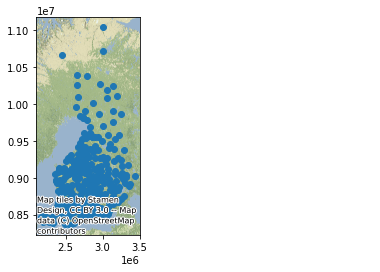

In [23]:
import contextily as ctx
ax=power.to_crs(crs_web).plot()
ctx.add_basemap(ax=ax, zoom=9)